In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


#import warnings
#warnings.filterwarnings('ignore')


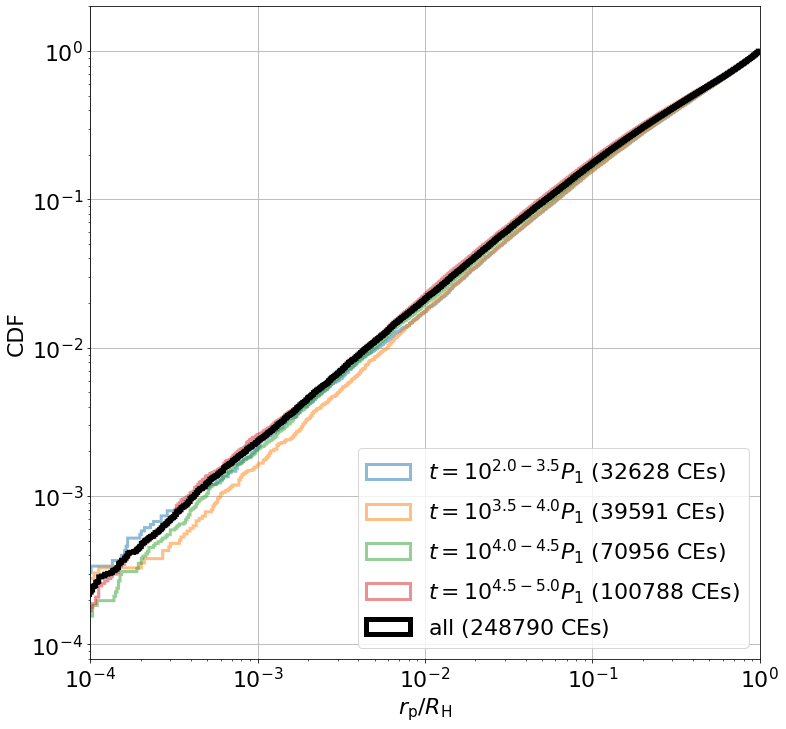

In [4]:
## 
##  Read the data for canonical runs
##

RH = (2e-5/3)**(1./3.)

can_CE0 = np.load('d:/_work/BBH-data_use/_data/can_CE0-2000.npy')
can_CE1 = can_CE0[ (can_CE0[:,3]*(1-can_CE0[:,4])<RH*1e-1), : ]
can_CE2 = can_CE0[ (can_CE0[:,3]*(1-can_CE0[:,4])<RH*1e-2), : ]
can_CE3 = can_CE0[ (can_CE0[:,3]*(1-can_CE0[:,4])<RH*1e-3), : ]
can_CE4 = can_CE0[ (can_CE0[:,3]*(1-can_CE0[:,4])<RH*1e-4), : ]
can_CE5 = can_CE0[ (can_CE0[:,3]*(1-can_CE0[:,4])<RH*1e-5), : ]




##
##  Plot the time evolution of number
##
plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(1,1, sharex=True, figsize=(12,12))
fig.subplots_adjust(hspace=0.0)

axs.set_xlabel(r'$r_{\rm p}/R_{\rm H}$')
axs.set_ylabel(r'CDF')

axs.set_xlim([1e-4,1e-0])
axs.set_ylim([0.8e-4,2])

axs.set_xscale('log')
axs.set_yscale('log')

# parameters of the plot

bin_use = 10**np.linspace(-9,0.1,1001)
aluse = 0.5
lw = 3

# plot the time evolution of rp
t_range = 10.**np.array([2,3.5,4,4.5,5])
#t_range = np.logspace(1,5,6)
for i in range(len(t_range)-1):
    t0 = t_range[i]
    tf = t_range[i+1]
    t_i = (can_CE0[:,0]>t0) * (can_CE0[:,0]<tf)
    eta = can_CE0[t_i,3] * (1-can_CE0[t_i,4]) / RH
    Nuse = len(eta)
    axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
             label=r'$t=10^{%2.1f-%2.1f}P_1$ ($%5d$ CEs)' %(np.log10(t0),np.log10(tf),Nuse),
             alpha=aluse,histtype='step')    

# plot the distribution of rp

eta = can_CE0[:,3] * (1-can_CE0[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=5,density=True,cumulative=True,
         label='all ($%5d$ CEs)'%Nuse,edgecolor='k',histtype='step')




##  Save the figure
#axs.legend(loc=9,ncol=3)
axs.legend(loc=4,ncol=1)
axs.grid()
axs.set_axisbelow(True)

plt.savefig('./pics/pics-CDF-rp-time.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-CDF-rp-time.png',bbox_inches='tight',transparent=True)
